<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulacion-1/blob/main/Proyecto_Admin_Prod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#LIBRERÍAS

# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Carga base datos
from google.colab import files
uploaded = files.upload()

Saving BD_Metro.xlsx to BD_Metro (1).xlsx


In [ ]:
# Visualiza base de datos
df = pd.read_excel('BD_Metro.xlsx')
df.head()

,AÑO,PERIODO,MES,INGRESOS
0,2021,1,Marzo,316385920
1,2021,2,Abril,301978060
2,2021,3,Mayo,302150075
3,2021,4,Junio,306177600
4,2021,5,Julio,338026165


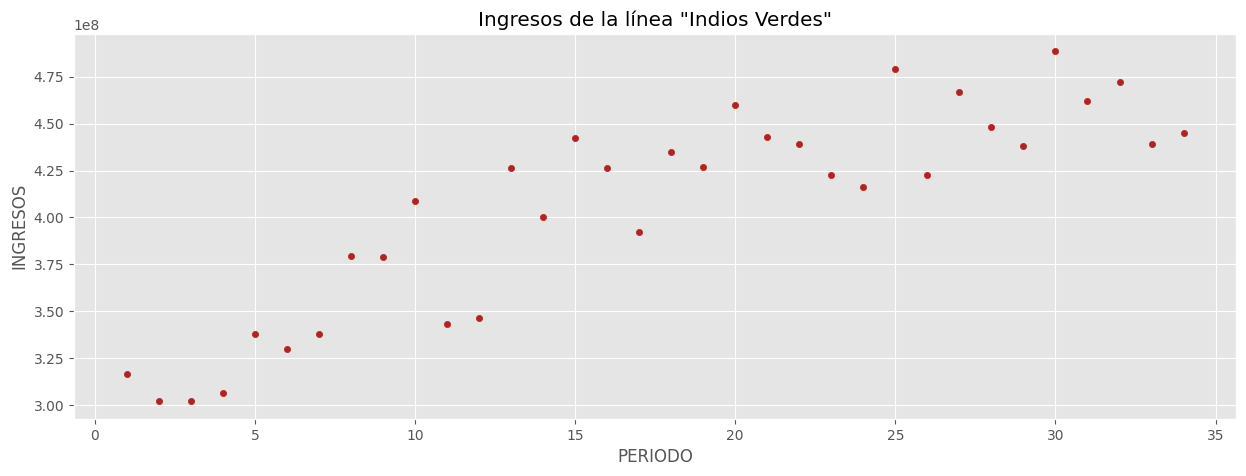

In [ ]:
# Gráfico de dispersión

fig, ax = plt.subplots(figsize=(15, 5))

df.plot(
    x    = 'PERIODO',
    y    = 'INGRESOS',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Ingresos de la línea "Indios Verdes"');

In [ ]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = df['PERIODO'], y =  df['INGRESOS'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.8755991101536296
P-value:  1.2225714685244772e-11


In [ ]:
# El coeficiente de correlación de Pearson de 0.876 indica una correlación positiva
#         fuerte entre las dos variables

# El p-valor extremadamente bajo indica que esta correlación es muy probablemente
#         significativa desde el punto de vista estadístico

In [ ]:
# División de los datos en entrenamiennapruprueba
X = df[['PERIODO']]         #Variable independienteendiente
y = df['INGRESOS']          #Variable dependiente n

#Divide los datos en dos conjuntos, uno para entrenamiento (X_train, y_train)
#   y otro para prueba (Y_prueba, y_test).

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size=  0.8,
                                        random_state = 1234,
                                        shuffle      = True

                              )

# Creación del modelo

modelo = LinearRegression()
modelo.fit(X = X_entrenamiento.reshape(-1, 1), y = y_entrenamiento)

LinearRegression()

In [ ]:
# Modelo de regresión lineal  Y=a+bx

print("Intercept:", modelo.intercept_)                                  #Constante (a)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))   #Coeficiente (b)
print("Coeficiente de determinación R^2:", modelo.score(X, y))          #Coeficiente de determinación

Intercept: [3.20550404e+08]
Coeficiente: [('PERIODO', 4799061.298103067)]
Coeficiente de determinación R^2: 0.7661979242312202


In [ ]:
# Error de test del modelo

predicciones = modelo.predict(X = X_prueba)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")   #Raíz del Error Cuadrático Medio


El error (rmse) de test es: 23389599.232844453


In [ ]:
# Información del modelo
X_entrenamiento = sm.add_constant(X_entrenamiento, prepend=True)
modelo = sm.OLS(endog=y_entrenamiento, exog=X_entrenamiento,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     66.56
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           1.64e-08
Time:                        08:09:44   Log-Likelihood:                -500.56
No. Observations:                  27   AIC:                             1005.
Df Residuals:                      25   BIC:                             1008.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.206e+08   1.26e+07     25.460      0.0

In [ ]:
# Intervalos de confianza para los coeficientes del modelo
modelo.conf_int(alpha=0.05)

array([[2.94619620e+08, 3.46481188e+08],
       [3.58754229e+06, 6.01058031e+06]])

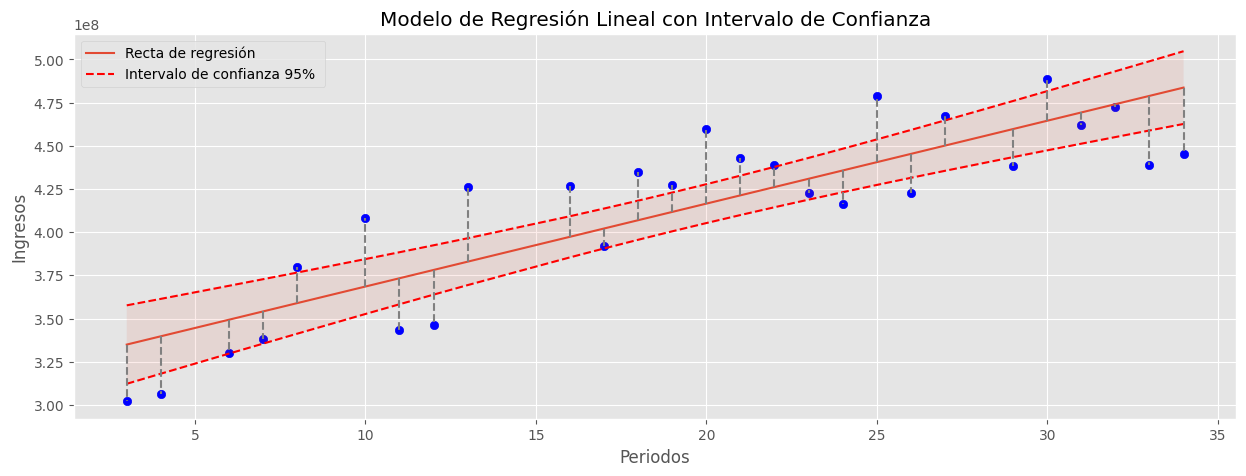

In [ ]:
# Predicciones con intervalo de confianza del 95%
predicciones = modelo.get_prediction(exog = X_entrenamiento).summary_frame(alpha=0.05)
predicciones['x'] = X_entrenamiento[:, 1]
predicciones['y'] = y_entrenamiento
predicciones = predicciones.sort_values('x')

# Calcular los residuos
predicciones['residuos'] = predicciones['y'] - predicciones['mean']

# Gráfico del modelo
fig, ax = plt.subplots(figsize=(15,5))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "blue")      #Datos reales
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="Recta de regresión")      #Línea de regresión
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="Intervalo de confianza 95% ")  #Intervalo de confianza inferior
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')                  #Intervalo de confianza superior
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

# Línead de error
for i in range(len(predicciones)):
    ax.vlines(x=predicciones['x'].iloc[i], ymin=predicciones['mean'].iloc[i], ymax=predicciones['y'].iloc[i], color='gray', linestyle='--')

ax.set_title('Modelo de Regresión Lineal con Intervalo de Confianza')
ax.set_xlabel('Periodos')
ax.set_ylabel('Ingresos')
ax.legend()

ax.legend()

In [ ]:
#Estimaciones para el año 2024

# Coeficientes del modelo
beta0 = 3.206e+08
beta1 = 4.799e+06

# Periodos
periodos = np.arange(35, 47)

estimaciones = beta0 + beta1 * np.arange(35, 47)

# Crear un DataFrame con las predicciones
df_estimaciones = pd.DataFrame({
    'Periodo': periodos,
    'Predicción': estimaciones
})

# Imprimir el DataFrame con las predicciones
df_estimaciones.head(12)


,Periodo,Predicción
0,35,488565000.0
1,36,493364000.0
2,37,498163000.0
3,38,502962000.0
4,39,507761000.0
5,40,512560000.0
6,41,517359000.0
7,42,522158000.0
8,43,526957000.0
9,44,531756000.0
